# Lab 2: Data Types
Welcome to lab 2!

Last time, we had our first look at Python and Jupyter notebooks.  So far, we've primarily used Python to manipulate numbers and text.  There's a lot more to life than those, so Python lets us represent many other types of data in programs.

In this lab, you'll see how to work with datasets in Python -- *collections* of data, like the numbers 2 through 5 or the words "welcome", "to", and "lab". We will see how to manipulate these datasets through the lenses of *arrays*, *lists*, and *tables*.

# 1. Arrays

Up to now, we haven't done much that you couldn't do yourself by hand, without going through the trouble of learning Python.  Computers are most useful when you can use a small amount of code to *do the same action* to *many different things*.

For example, in the time it takes you to calculate the 18% tip on a restaurant bill, a laptop can calculate 18% tips for every restaurant bill paid by every human on Earth that day.  (That's if you're pretty fast at doing arithmetic in your head!)

**Arrays** are how we put many values in one place so that we can operate on them as a group. For example, if `billions_of_numbers` is an array of numbers, the expression

    .18 * billions_of_numbers

gives a new array of numbers that's the result of multiplying each number in `billions_of_numbers` by .18 (18%).  Arrays are not limited to numbers; we can also put all the words in a book into an array of strings.

Concretely, an array is a **collection of values of the same type**, like a column in an Excel spreadsheet.


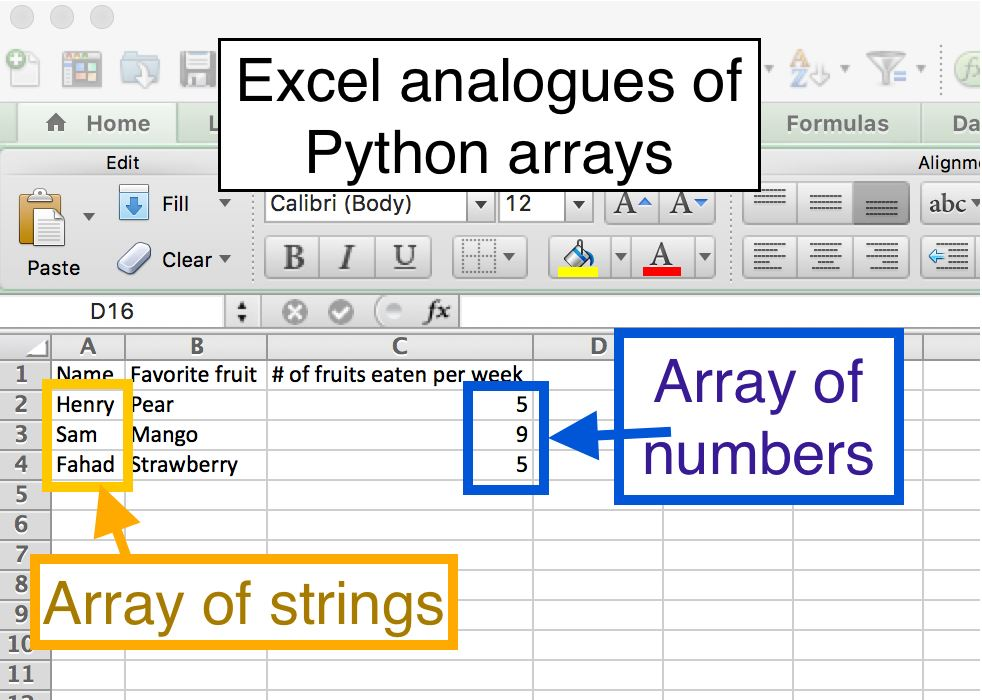

## 1.1. Making arrays
You can type in the data that goes in an array yourself, but that's not typically how programs work. Normally, we create arrays by loading them from an external source, like a data file.

First, though, let's learn how to do it the hard way. Execute the following cell so that all the functionality from the `numpy` module are available to you.

In [187]:
import numpy as np

Now, to create an array, call the function `np.array()`. One easy and common way to create an array from scratch is passing a `list` into the function call which is specified using square brackets `[]`. Note that Python lists and arrays are often used interchangeably, but have some fundamental differences in regards to how they handle arithmetic and other operations. For now, we're focusing on arrays. Run this cell to see an example:

In [188]:
np.array([0.125, 4.75, -1.3])

array([ 0.125,  4.75 , -1.3  ])

Each value in an array (in the above case, the numbers 0.125, 4.75, and -1.3) is called an *element* of that array.

Arrays themselves are also values, just like numbers and strings.  That means you can assign them names or use them as arguments to functions.

**Question 1:** Make an array containing the numbers 1, 2, and 3, in that order.  Name it `small_numbers`.

In [189]:
small_numbers = np.array([1, 2, 3])
small_numbers

array([1, 2, 3])

**Question 2:** Make an array containing the five strings `"Hello"`, `","`, `" "`, `"world"`, and `"!"`.  (The third one is a single space inside quotes.)  Name it `hello_world_components`.

*Note:* If you print `hello_world_components`, you'll notice some extra information in addition to its contents: `dtype='<U5'`.  That's just NumPy's extremely cryptic way of saying that the things in the array are strings.

In [190]:
hello_world_components = np.array(["Hello", ",", " ", "world", "!"])
hello_world_components

array(['Hello', ',', ' ', 'world', '!'], dtype='<U5')

The `join` method of a string takes an array of strings as its argument and puts all of the elements together into one string. Try it:

In [191]:
'°'.join(np.array(['(╯', '□','）╯︵ ┻━┻']))

'(╯°□°）╯︵ ┻━┻'

**Question 3:** Assign `separator` to a string so that the name `hello` is bound to the string `'Hello, world!'` in the cell below.

In [192]:
separator = ""
hello = separator.join(hello_world_components)
hello

'Hello, world!'

### 1.1.1.  `np.arange`

Very often in data science, we want to work with many numbers that are evenly spaced within some range.  NumPy provides a special function for this called `arange`.  `np.arange(start, stop, space)` produces an array with all the numbers starting at `start` and counting up by `space`, stopping before `stop` is reached.

For example, the value of `np.arange(1, 6, 2)` is an array with elements 1, 3, and 5 -- it starts at 1 and counts up by 2, then stops before 6.  In other words, it's equivalent to `np.array([1, 3, 5])`.

`np.arange(4, 9, 1)` is an array with elements 4, 5, 6, 7, and 8.  (It doesn't contain 9 because `np.arange` stops *before* the stop value is reached. Another way to think about this is interval notation– [4, 9) means that you take 4 inclusive, but 9 exclusive.)

**Question 4:** Import `numpy` as `np` and then use `np.arange` to create an array with the multiples of 99 from 0 up to (**and including**) 9999.  (So its elements are 0, 99, 198, 297, etc.)

In [193]:
...
multiples_of_99 = np.arange(0, 10000, 99)
multiples_of_99

array([   0,   99,  198,  297,  396,  495,  594,  693,  792,  891,  990,
       1089, 1188, 1287, 1386, 1485, 1584, 1683, 1782, 1881, 1980, 2079,
       2178, 2277, 2376, 2475, 2574, 2673, 2772, 2871, 2970, 3069, 3168,
       3267, 3366, 3465, 3564, 3663, 3762, 3861, 3960, 4059, 4158, 4257,
       4356, 4455, 4554, 4653, 4752, 4851, 4950, 5049, 5148, 5247, 5346,
       5445, 5544, 5643, 5742, 5841, 5940, 6039, 6138, 6237, 6336, 6435,
       6534, 6633, 6732, 6831, 6930, 7029, 7128, 7227, 7326, 7425, 7524,
       7623, 7722, 7821, 7920, 8019, 8118, 8217, 8316, 8415, 8514, 8613,
       8712, 8811, 8910, 9009, 9108, 9207, 9306, 9405, 9504, 9603, 9702,
       9801, 9900, 9999])

##### Temperature readings
NOAA (the US National Oceanic and Atmospheric Administration) operates weather stations that measure surface temperatures at different sites around the United States.  The hourly readings are [publicly available](http://www.ncdc.noaa.gov/qclcd/QCLCD?prior=N).

Suppose we download all the hourly data from the Oakland, California site for the month of December 2015.  To analyze the data, we want to know when each reading was taken, but we find that the data don't include the timestamps of the readings (the time at which each one was taken).

However, we know the first reading was taken at the first instant of December 2015 (midnight on December 1st) and each subsequent reading was taken exactly 1 hour after the last.

**Question 5.** Create an array of the *time, in seconds, since the start of the month* at which each hourly reading was taken.  Name it `collection_times`.

*Hint 1:* There were 31 days in December, which is equivalent to ($31 \times 24$) hours or ($31 \times 24 \times 60 \times 60$) seconds.  So your array should have $31 \times 24$ elements in it.

*Hint 2:* The `len` function works on arrays, too.  If your `collection_times` isn't passing the tests, check its length and make sure it has $31 \times 24$ elements. Alternatively, try using the numpy `size` attribute to measure the number of elements within the array.

In [194]:
collection_times = np.arange(0, 31*24*60*60, 60*60)
collection_times
np.size(collection_times)

744

## 1.2. Working with single elements of arrays ("indexing")
Let's work with a more interesting dataset.  The next cell creates an array called `population` that includes estimated world populations in every year from **1950** to roughly the present.

Rather than type in the data manually, we've loaded them from a file on your computer called `world_population.csv`.

In [195]:
# Don't worry too much about what goes on in this cell, we'll cover it later in the lab.
import pandas as pd

population = pd.read_csv("lab 2 data/world_population.csv")['Population'].values
population

array([2557628654, 2594939877, 2636772306, 2682053389, 2730228104,
       2782098943, 2835299673, 2891349717, 2948137248, 3000716593,
       3043001508, 3083966929, 3140093217, 3209827882, 3281201306,
       3350425793, 3420677923, 3490333715, 3562313822, 3637159050,
       3712697742, 3790326948, 3866568653, 3942096442, 4016608813,
       4089083233, 4160185010, 4232084578, 4304105753, 4379013942,
       4451362735, 4534410125, 4614566561, 4695736743, 4774569391,
       4856462699, 4940571232, 5027200492, 5114557167, 5201440110,
       5288955934, 5371585922, 5456136278, 5538268316, 5618682132,
       5699202985, 5779440593, 5857972543, 5935213248, 6012074922,
       6088571383, 6165219247, 6242016348, 6318590956, 6395699509,
       6473044732, 6551263534, 6629913759, 6709049780, 6788214394,
       6866332358, 6944055583, 7022349283, 7101027895, 7178722893,
       7256490011])

Here's how we get the first element of `population`, which is the world population in the first year in the dataset, 1950.

In [196]:
population[0]

2557628654

The value of that expression is the number 2557628654 (around 2.5 billion), because that's the first element in the array `population`.

Notice that we wrote `[0]`, not `[1]`, to get the first element.  This is a weird convention in computer science.  0 is called the *index* of the first item.  It's the number of elements that appear *before* that item.  So 3 is the index of the 4th item.

Here are some more examples.  In the examples, we've given names to the things we get out of `population`.  Read and run each cell.

In [197]:
# The third element in the array is the population
# in 1952.
population_1952 = population[2]
population_1952

2636772306

In [198]:
# The thirteenth element in the array is the population
# in 1962 (which is 1950 + 12).
population_1962 = population[12]
population_1962

3140093217

In [199]:
# The 66th element is the population in 2015.
population_2015 = population[65]
population_2015

7256490011

In [200]:
# The array has only 66 elements, so this doesn't work.
# (There's no element with 66 other elements before it.)
population_2016 = population[66]
population_2016

IndexError: index 66 is out of bounds for axis 0 with size 66

Arrays can also be indexed backwards. If we want to get the last element in an array, we could for example write the following `population[len(population)-1]`, where we calculate the length of the array and then subtract one as array indexes start at 0, so the last element will be at the index of the length of the array minus 1.

However, if we don't want to explicitly use the length of the array, we can index backwards using negative numbers. For example, the last element of the array will be stored at an index of `-1`, the second last element will be at index `-2` and so on. Below are some examples that demonstrate how we can find elements of an array using negative indices.

In [ ]:
# The last element in the array
population[-1]

In [ ]:
# The 5th to last element in the array
population[-5]

**Question 6:** Set `population_1973` to the world population in 1973, by getting the appropriate element from `population` using the correct index.

In [ ]:
population_1973 = population[23]
population_1973

3942096442

## 1.3. Doing something to every element of an array
Arrays are primarily useful for doing the same operation many times, so we don't often have to work with single elements.

##### Logarithms
Here is one simple question we might ask about world population:

> How big was the population in *orders of magnitude* in each year?

The logarithm function is one way of measuring how big a number is. The logarithm (base 10) of a number increases by 1 every time we multiply the number by 10. It's like a measure of how many decimal digits the number has, or how big it is in orders of magnitude.

We could try to answer our question like this, using the `log10` function from the `math` module and the index method you just saw:

In [ ]:
import math
population_1950_magnitude = math.log10(population[0])
population_1951_magnitude = math.log10(population[1])
population_1952_magnitude = math.log10(population[2])
population_1953_magnitude = math.log10(population[3])

population_1950_magnitude

9.407837488842446

But this is tedious and doesn't really take advantage of the fact that we are using a computer.

Instead, NumPy provides its own version of `log10` that takes the logarithm of each element of an array.  It takes a single array of numbers as its argument.  It returns an array of the same length, where the first element of the result is the logarithm of the first element of the argument, and so on.

**Question 7:** Use it to compute the logarithms of the world population in every year.  Give the result (an array of 66 numbers) the name `population_magnitudes`.  Your code should be very short.

In [ ]:
population_magnitudes = np.log10(population)
population_magnitudes

array([9.40783749, 9.4141273 , 9.42107263, 9.42846742, 9.43619893,
       9.44437257, 9.45259897, 9.46110062, 9.4695477 , 9.47722498,
       9.48330217, 9.48910971, 9.49694254, 9.50648175, 9.51603288,
       9.5251    , 9.53411218, 9.54286695, 9.55173218, 9.56076229,
       9.56968959, 9.57867667, 9.58732573, 9.59572724, 9.60385954,
       9.61162595, 9.61911264, 9.62655434, 9.63388293, 9.64137633,
       9.64849299, 9.6565208 , 9.66413091, 9.67170374, 9.67893421,
       9.68632006, 9.69377717, 9.70132621, 9.70880804, 9.7161236 ,
       9.72336995, 9.73010253, 9.73688521, 9.74337399, 9.74963446,
       9.75581413, 9.7618858 , 9.76774733, 9.77343633, 9.77902438,
       9.7845154 , 9.78994853, 9.7953249 , 9.80062024, 9.80588805,
       9.81110861, 9.81632507, 9.82150788, 9.82666101, 9.83175555,
       9.83672482, 9.84161319, 9.84648243, 9.85132122, 9.85604719,
       9.8607266 ])

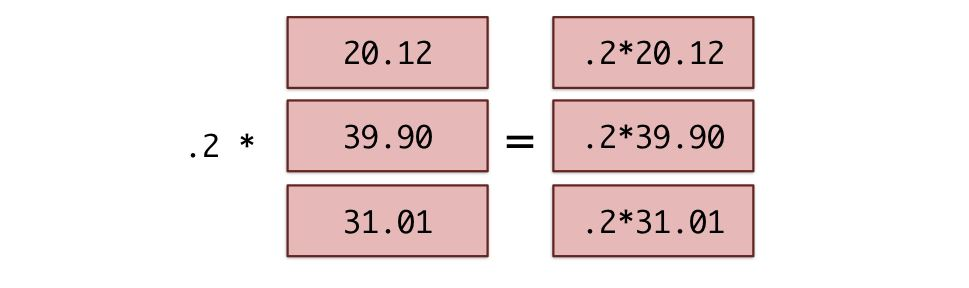

This is called *elementwise* application of the function, since it operates separately on each element of the array it's called on.  The textbook's section on arrays has a useful list of NumPy functions that are designed to work elementwise, like `np.log10`.

##### Arithmetic
Arithmetic also works elementwise on arrays.  For example, you can divide all the population numbers by 1 billion to get numbers in billions:

In [ ]:
population_in_billions = population / 1000000000
population_in_billions

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.86633236, 6.94405558, 7.02234928, 7.10102789, 7.17872289,
       7.25649001])

You can do the same with addition, subtraction, multiplication, and exponentiation (`**`). For example, you can calculate a tip on several restaurant bills at once (in this case just 3):

In [ ]:
restaurant_bills = np.array([20.12, 39.90, 31.01])
print("Restaurant bills:\t", restaurant_bills)
tips = .2 * restaurant_bills
print("Tips:\t\t\t", tips)

Restaurant bills:	 [20.12 39.9  31.01]
Tips:			 [4.024 7.98  6.202]


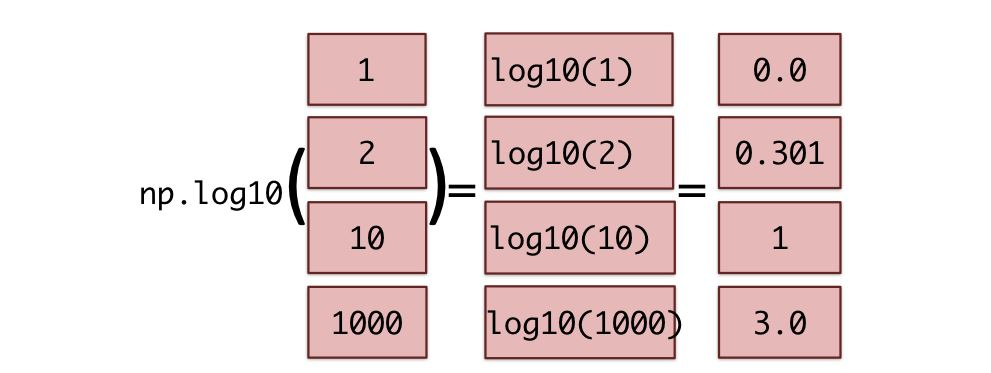

**Question 8:** Suppose the total charge at a restaurant is the original bill plus the tip, and the tip is always 20% of the pre-tip bill.  That means we can multiply the original bill by 1.2 to get the total charge.  Compute the total charge for each bill in `restaurant_bills`.

In [ ]:
total_charges = 1.2*restaurant_bills
total_charges

array([24.144, 47.88 , 37.212])

**Question 9:** `more_restaurant_bills.csv` contains 100,000 bills!  Compute the total charge for each one.  How is your code different?

In [ ]:
more_restaurant_bills = pd.read_csv("lab 2 data/more_restaurant_bills.csv")["Bill"].values
more_total_charges = 1.2*more_restaurant_bills
more_total_charges

# The only difference is the size of the array we apply element-wise operations on
# and the size of the array we get back. Output has an ellipse since the array is 
# so large

array([20.244, 20.892, 12.216, ..., 19.308, 18.336, 35.664])

The function `sum` takes a single array of numbers as its argument.  It returns the sum of all the numbers in that array (so it returns a single number, not an array).

**Question 10:** What was the sum of all the bills in `more_restaurant_bills`, *including tips*?

In [ ]:
sum_of_bills = sum(more_total_charges)
sum_of_bills

1795730.0640000193

**Question 11:** The powers of 2 ($2^0 = 1$, $2^1 = 2$, $2^2 = 4$, etc) arise frequently in computer science.  (For example, you may have noticed that storage on smartphones or USBs come in powers of 2, like 16 GB, 32 GB, or 64 GB.)  Use `np.arange` and the exponentiation operator `**` to compute the first 30 powers of 2, starting from `2^0`.

In [ ]:
powers_of_2 = 2**np.arange(0, 30, 1)
powers_of_2


array([        1,         2,         4,         8,        16,        32,
              64,       128,       256,       512,      1024,      2048,
            4096,      8192,     16384,     32768,     65536,    131072,
          262144,    524288,   1048576,   2097152,   4194304,   8388608,
        16777216,  33554432,  67108864, 134217728, 268435456, 536870912])

## 2. Using lists

A *list* is another Python sequence type, similar to an array. It's different than an array because the values it contains can all have different types. A single list can contain `int` values, `float` values, strings and more. Elements in a list can even be other lists! A list is created by giving a name to the list of values enclosed in square brackets and separated by commas. For example, `values_with_different_types = ['data', 118, ['lab', 2]]`.



Lists can be useful when working with tables because they can describe the contents of one row in a table, which often  corresponds to a sequence of values with different types. A list of lists can be used to describe multiple rows.

Each column in a table is a collection of values with the same type (an array). If you create a table column from a list, it will automatically be converted to an array. A row, on the ther hand, mixes types.

Here's a table from Chapter 5. (Run the cell below.)

In [ ]:
# Run this cell to recreate the table
flowers = pd.DataFrame(
    [[8, 'lotus'], [34, 'sunflower'], [5, 'rose']], # each sublist in this list will be a row in the dataframe
    columns = ['Number of petals', 'Name']
)
flowers

,Number of petals,Name
0,8,lotus
1,34,sunflower
2,5,rose


**Question 12.** Create a list that describes a new row of this table. The details can be whatever you want, but the list must contain two values: the number of petals (an `int` value) and the name of the flower (a string). How about the "pondweed"? Its flowers have zero petals.

In [ ]:
my_flower = [0, 'pondweed']
my_flower

[0, 'pondweed']

**Observation 2.2.** Suppose we want to add `my_flower` to the `flowers` table, in addition to the 3 flowers in `other_flowers`. We'll do this by first appending `my_flower` to `other_flowers`, then turning `other_flowers` into its own dataframe we can then append to `flowers`.

In [ ]:
other_flowers = [[10, 'lavender'], [3, 'birds of paradise'], [6, 'tulip']]

# append my_flower to other_flowers
other_flowers.append(my_flower)

other_flowers

[[10, 'lavender'], [3, 'birds of paradise'], [6, 'tulip'], [0, 'pondweed']]

In [ ]:
#make a list of dataframes to append the new dataframe onto the previous one

seven_flowers = pd.concat([pd.DataFrame(other_flowers, columns = flowers.columns), flowers])
seven_flowers

,Number of petals,Name
0,10,lavender
1,3,birds of paradise
2,6,tulip
3,0,pondweed
0,8,lotus
1,34,sunflower
2,5,rose


Notice that we used the argument `.append()` on two different types of data structures here, and they behaved slightly differently. When you append an element to a `list`, the list gets changed *in place*, which means that `other_flowers` has actually been changed. However, when you append to a dataframe, it creates a *new* dataframe with extra rows; the original dataframe is unchanged. You can verify this below:

In [ ]:
# should only have the original 3 rows
flowers

,Number of petals,Name
0,8,lotus
1,34,sunflower
2,5,rose


## 3. DataFrames

For a collection of things in the world, an array is useful for describing a single attribute of each thing. For example, among the collection of US States, an array could describe the land area of each. Tables extend this idea by describing multiple attributes for each element of a collection.

In most data science applications, we have data about many entities, but we also have several kinds of data about each entity.

For example, in the cell below we have two arrays. The first one contains the world population in each year by the US Census Bureau, and the second contains the years themselves (in order, so the first elements in the population and the years arrays correspond).

In [ ]:
population_amounts = pd.read_csv("lab 2 data/world_population_summary.csv")["Population"].values
years = np.arange(1950, 2015+1)
print("Population column:", population_amounts)
print("Years column:", years)

Population column: [2557628654 2594939877 2636772306 2682053389 2730228104 2782098943
 2835299673 2891349717 2948137248 3000716593 3043001508 3083966929
 3140093217 3209827882 3281201306 3350425793 3420677923 3490333715
 3562313822 3637159050 3712697742 3790326948 3866568653 3942096442
 4016608813 4089083233 4160185010 4232084578 4304105753 4379013942
 4451362735 4534410125 4614566561 4695736743 4774569391 4856462699
 4940571232 5027200492 5114557167 5201440110 5288955934 5371585922
 5456136278 5538268316 5618682132 5699202985 5779440593 5857972543
 5935213248 6012074922 6088571383 6165219247 6242016348 6318590956
 6395699509 6473044732 6551263534 6629913759 6709049780 6788214394
 6866332358 6944055583 7022349283 7101027895 7178722893 7256490011]
Years column: [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 

Suppose we want to answer this question:

> When did world population cross 6 billion?

You could technically answer this question just from staring at the arrays, but it's a bit convoluted, since you would have to count the position where the population first crossed 6 billion, then find the corresponding element in the years array. In cases like these, it might be easier to put the data into a *`DataFrame`*, a 2-dimensional type of dataset.

The expression below shows how we construct a dataframe with two columns. Inside of the `pd.DataFrame()` constructor is a `dictionary`, which is another Python collection that holds what are known as *key-value pairs*. This method of constructing a dataframe makes columns using the `keys` in the dictionary (element before the `:`) and sets those columns equal to the `values` (elements after the `:`). Here, the dictionary keys are strings and the values are arrays; in general, keys need to just be a single item while values can be a collection of items (individual elements, lists, arrays, etc).


In [ ]:
population = pd.DataFrame({
    'Population': population_amounts,
    'Year': years
})
population

,Population,Year
0,2557628654,1950
1,2594939877,1951
2,2636772306,1952
3,2682053389,1953
4,2730228104,1954
...,...,...
61,6944055583,2011
62,7022349283,2012
63,7101027895,2013
64,7178722893,2014


Now the data are all together in a single table! It's much easier to parse this data--if you need to know what the population was in 1959, for example, you can tell from a single glance. We'll revisit this table later.

## 4. Creating Tables

**Question 13.** In the cell below, we've created 2 arrays. Using the steps above, assign `top_10_movies` to a table that has two columns called "Rating" and "Name", which hold `top_10_movie_ratings` and `top_10_movie_names` respectively.

In [ ]:
top_10_movie_ratings = np.array([9.2, 9.2, 9., 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.8])
top_10_movie_names = np.array([
        'The Shawshank Redemption (1994)',
        'The Godfather (1972)',
        'The Godfather: Part II (1974)',
        'Pulp Fiction (1994)',
        "Schindler's List (1993)",
        'The Lord of the Rings: The Return of the King (2003)',
        '12 Angry Men (1957)',
        'The Dark Knight (2008)',
        'Il buono, il brutto, il cattivo (1966)',
        'The Lord of the Rings: The Fellowship of the Ring (2001)'])

top_10_movies = pd.DataFrame({
    "Name": top_10_movie_names,
    "Rating": top_10_movie_ratings
})
# We've put this next line here so your table will get printed out when you
# run this cell.
top_10_movies

,Name,Rating
0,The Shawshank Redemption (1994),9.2
1,The Godfather (1972),9.2
2,The Godfather: Part II (1974),9.0
3,Pulp Fiction (1994),8.9
4,Schindler's List (1993),8.9
5,The Lord of the Rings: The Return of the King ...,8.9
6,12 Angry Men (1957),8.9
7,The Dark Knight (2008),8.9
8,"Il buono, il brutto, il cattivo (1966)",8.9
9,The Lord of the Rings: The Fellowship of the R...,8.8


#### Loading a table from a file
In most cases, we aren't going to go through the trouble of typing in all the data manually. Instead, we can use our `Pandas` functions.

`pd.read_csv` takes one argument, a path to a data file (a string) in the form of a comma-seperated values file and returns a table.  There are many formats for data files, but CSV ("comma-separated values") is the most common.

**Question 14:** The file `imdb.csv` contains a table of information about the 250 highest-rated movies on IMDb. Upload the `imdb.csv` into the same folder as the lab02b.ipynb is in and load it as a table called `imdb`.

In [ ]:
imdb = pd.read_csv('lab 2 data/imdb.csv')
imdb

,Votes,Rating,Title,Year,Decade
0,88355,8.4,M,1931,1930
1,132823,8.3,Singin' in the Rain,1952,1950
2,74178,8.3,All About Eve,1950,1950
3,635139,8.6,Léon,1994,1990
4,145514,8.2,The Elephant Man,1980,1980
...,...,...,...,...,...
245,1078416,8.7,Forrest Gump,1994,1990
246,31003,8.1,Le salaire de la peur,1953,1950
247,167076,8.2,3 Idiots,2009,2000
248,91689,8.1,Network,1976,1970


Notice that there are ellipses in the middle of the table - this table is big enough that only a few of its rows are displayed, but the others are still there. If you want to just look at the first few rows of your dataframe, you can use the argument `df.head()`, which, by default, shows the first 5 rows.

Open up the `imdb.csv` file in that folder and look at the format. What do you notice? The `.csv` filename ending says that this file is in the [CSV (comma-separated value) format](http://edoceo.com/utilitas/csv-file-format).

## 5. Analyzing datasets
With just a few table methods, we can answer some interesting questions about the IMDb dataset.

If we want just the ratings of the movies, we can get an array that contains the data in that column. In Pandas, there are a few ways to extract a column from a dataframe.

The following two methods are equivalent and return Pandas `Series` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)). Note that if you want to extract a column using a `.` the column name can't have any spaces and cannot begin with a number.

In [ ]:
imdb.Rating
imdb['Rating']

0      8.4
1      8.3
2      8.3
3      8.6
4      8.2
      ... 
245    8.7
246    8.1
247    8.2
248    8.1
249    8.3
Name: Rating, Length: 250, dtype: float64

If you want to extract the column into an actual numpy array, you need to add the argument `.values` to the end of the column extraction (see below).

The primary difference between a Series and an array is how they are indexed. In arrays, the index is always numeric and in order, so `my_array[0]` will always return the first element of the array. In Series, the index follows whatever the index of the table was. By default, table indices are ordinal and numeric, but they don't have to be. You'll see an example below where the indexing matters.



In [ ]:
imdb['Rating'].values

array([8.4, 8.3, 8.3, 8.6, 8.2, 8.3, 8.1, 8.3, 8.2, 8. , 8.1, 8.2, 8.3,
       8.3, 8.1, 8.4, 8.5, 8.2, 8.1, 8.4, 8.1, 8.1, 9.2, 8. , 8.2, 8.1,
       8.2, 8.5, 8. , 8.3, 8.1, 8. , 8. , 8.3, 8.1, 8. , 8. , 8.3, 8.4,
       8.1, 8.1, 8.5, 8.5, 8. , 8.3, 8.1, 8. , 8.6, 8.5, 8.3, 8.3, 8. ,
       8.2, 9.2, 8.2, 8.5, 8. , 8.9, 8.4, 8.2, 8.1, 8.3, 8.1, 8.1, 8.1,
       8.3, 8.2, 8.3, 8.7, 8.3, 8.6, 8. , 8.1, 8.2, 8.5, 8.3, 8.9, 8. ,
       8.6, 8.3, 8.1, 8.7, 8.4, 8.1, 8.4, 8. , 8.5, 8.8, 8.2, 8.2, 8.5,
       9. , 8. , 8. , 8.3, 8.4, 8.6, 8.5, 8.7, 8.4, 8.1, 8.1, 8.1, 8.7,
       8.4, 8.9, 8.1, 8.2, 8. , 8.5, 8.5, 8. , 8. , 8.4, 8.1, 8.1, 8. ,
       8. , 8.3, 8.1, 8. , 8.3, 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8.7,
       8.3, 8. , 8. , 8.5, 8. , 8.1, 8.1, 8.1, 8.3, 8.2, 8.3, 8.9, 8.2,
       8.2, 8. , 8.3, 8.2, 8.9, 8.5, 8.5, 8.1, 8.1, 8.5, 8.3, 8. , 8.2,
       8.7, 8.3, 8.5, 8.1, 8.3, 8.2, 8.4, 8.1, 8.1, 8.1, 8. , 8.2, 8. ,
       8.6, 8.3, 8.2, 8. , 8.3, 8. , 8.2, 8. , 8.2, 8.8, 8.1, 8.

**Question 15:** Find the rating of the highest-rated movie in the dataset.

*Hint:* Think back to the functions you've learned about for working with arrays of numbers.  Ask for help if you can't remember one that's useful for this.

In [202]:
highest_rating = max(imdb['Rating'].values)
highest_rating

9.2

That's not very useful, though. You'd probably want to know the *name* of the movie whose rating you found!  To do that, we can sort the entire table by rating, which ensures that the ratings and titles will stay together.

In [ ]:
imdb.sort_values("Rating")

,Votes,Rating,Title,Year,Decade
124,91652,8.0,Akira,1988,1980
176,124671,8.0,Per un pugno di dollari,1964,1960
93,527349,8.0,Guardians of the Galaxy,2014,2010
92,49135,8.0,The Man Who Shot Liberty Valance,1962,1960
180,39447,8.0,Underground,1995,1990
...,...,...,...,...,...
147,761224,8.9,Schindler's List,1993,1990
105,384187,8.9,12 Angry Men,1957,1950
91,692753,9.0,The Godfather: Part II,1974,1970
53,1498733,9.2,The Shawshank Redemption,1994,1990


Well, that actually doesn't help much, either -- we sorted the movies from lowest -> highest ratings.  To look at the highest-rated movies, sort in reverse order:

In [ ]:
imdb.sort_values("Rating", ascending=False)

,Votes,Rating,Title,Year,Decade
22,1027398,9.2,The Godfather,1972,1970
53,1498733,9.2,The Shawshank Redemption,1994,1990
91,692753,9.0,The Godfather: Part II,1974,1970
105,384187,8.9,12 Angry Men,1957,1950
57,447875,8.9,"Il buono, il brutto, il cattivo (1966)",1966,1960
...,...,...,...,...,...
168,500576,8.0,"Monsters, Inc. (2001)",2001,2000
166,59578,8.0,The Big Sleep,1946,1940
46,427099,8.0,X-Men: Days of Future Past,2014,2010
51,87437,8.0,Roman Holiday,1953,1950


(The `ascending=False` bit is called an *optional argument*. It has a default value of `True`, so when you explicitly tell the function `ascending=False`, then the function will sort in descending order.)

So there are actually 2 highest-rated movies in the dataset: *The Shawshank Redemption* and *The Godfather*.

Some details about sort:

1. The first argument to `sort_values` is the name of a column to sort by.
2. If the column has strings in it, `sort_values` will sort alphabetically; if the column has numbers, it will sort numerically.
3. The value of `imdb.sort_values("Rating")` is a *copy of `imdb`*; the `imdb` table doesn't get modified. For example, if we called `imdb.sort_values("Rating")`, then running `imdb` by itself would still return the unsorted table.
4. Rows always stick together when a table is sorted.  It wouldn't make sense to sort just one column and leave the other columns alone.  For example, in this case, if we sorted just the "Rating" column, the movies would all end up with the wrong ratings.
5. Note that the numbers in bold on the left of the table are no longer in order. These numbers are the dataframe `index` and are associated with the original ordering of the table. This ordering is important to keep in mind when you are accessing elements of the dataframe.

**Question 16:** Create a version of `imdb` that's sorted chronologically, with the earliest movies first.  Call it `imdb_by_year`.

In [ ]:
imdb_by_year = imdb.sort_values("Year")
imdb_by_year

,Votes,Rating,Title,Year,Decade
173,55784,8.3,The Kid,1921,1920
205,58506,8.2,The Gold Rush,1925,1920
146,46332,8.2,The General,1926,1920
49,98794,8.3,Metropolis,1927,1920
0,88355,8.4,M,1931,1930
...,...,...,...,...,...
100,369141,8.1,The Grand Budapest Hotel,2014,2010
9,46987,8.0,Relatos salvajes,2014,2010
70,689541,8.6,Interstellar,2014,2010
233,262425,8.3,Mad Max: Fury Road,2015,2010


**Question 17.** What's the title of the earliest movie in the dataset?  You could just look this up from the output of the previous cell.  Instead, write Python code to find out.

*Hint:* Starting with `imdb_by_year`, extract the Title column to get an array, then index in to get the first item.

This is a good time to consider the difference between a Series and an array (i.e. extract the column using `.values` or not) - what happens if you try to index into the Series the same way you index into an array?

In [ ]:
earliest_movie_title = imdb_by_year["Title"].values[0]
earliest_movie_title

# If you don't use .values, you will return the Title of the 1st row of the 
# original table that is not organized by year. If you use .values, it will 
# take the first title organized by year. When you call elements, the rows keep 
# their index unless you create a new array with .values that creates a new set
# of indices (this is what we did above)

'The Kid'

## 6. Finding pieces of a dataset
Suppose you're interested in movies from the 1940s.  Sorting the table by year doesn't help you, because the 1940s are in the middle of the dataset.

Instead, we need to filter the dataframe.

In [ ]:
forties = imdb.loc[imdb.Decade == 1940]
forties

,Votes,Rating,Title,Year,Decade
21,55793,8.1,The Grapes of Wrath,1940,1940
50,86715,8.3,Double Indemnity,1944,1940
72,101754,8.1,The Maltese Falcon,1941,1940
75,71003,8.3,The Treasure of the Sierra Madre,1948,1940
102,35983,8.1,The Best Years of Our Lives,1946,1940
118,81887,8.3,Ladri di biciclette,1948,1940
120,66622,8.0,Notorious,1946,1940
158,350551,8.5,Casablanca,1942,1940
166,59578,8.0,The Big Sleep,1946,1940
167,78216,8.2,Rebecca,1940,1940


Ignore the syntax for the moment.  Instead, try to read that line like this:

> Assign the name **`forties`** to a table whose rows are the rows in the **`imdb`** table where we have **`loc`ated** the **`'Decade'`**s that are equal to **`1940`**.

An alternate way to filter data frames is as following:

In [ ]:
forties_alt = imdb[imdb['Decade'] == 1940]
forties_alt

,Votes,Rating,Title,Year,Decade
21,55793,8.1,The Grapes of Wrath,1940,1940
50,86715,8.3,Double Indemnity,1944,1940
72,101754,8.1,The Maltese Falcon,1941,1940
75,71003,8.3,The Treasure of the Sierra Madre,1948,1940
102,35983,8.1,The Best Years of Our Lives,1946,1940
118,81887,8.3,Ladri di biciclette,1948,1940
120,66622,8.0,Notorious,1946,1940
158,350551,8.5,Casablanca,1942,1940
166,59578,8.0,The Big Sleep,1946,1940
167,78216,8.2,Rebecca,1940,1940


Think of this code working inside out:

> imdb['Decade'] == 1940 --> we are finding the values that meet our established criteria
>
> imdb[imdb['Decade'] == 1940] --> put it in terms of the DF, not boolean values

This is just another way of filtering that doesn't use loc. Either are useful, but for this lab, continue to use .loc!

**Question 18.** Compute the average rating of movies from the 1940s.

*Hint:* The function `np.average` computes the average of an array of numbers.

In [ ]:
average_rating_in_forties = np.average(forties["Rating"].values)
average_rating_in_forties

8.257142857142856

Now let's dive into the details a bit more. When you want to extract a subset of a dataframe, you use `.loc[rows, columns]`

- `rows` describes the criterion that the rows you want to include need to meet
- `columns` is typically just a list of column names you want to extract

The `rows` argument can be a bit confusing. Let's look at it piece by piece using the example above.
The argument we made inside `.loc` extracts the `Decade` column and checks whether or not each row is equal to `1940` using the operator `==`. It is important to know the difference between a single `=` and a double `==`; a single `=` makes an *assignment* of a value to a variable (e.g. `today = "Wednesday"`), while the double `==` is a conditional that returns `True` when the things it is comparing are the same and `False` otherwise.

So when we run the following cell (the inside of the `.loc[]` argument above), we are returned a Series where an element is `True` if its corresponding row meets the condition and `False` if not.

In [ ]:
imdb.Decade == 1940

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Name: Decade, Length: 250, dtype: bool

This Series is then passed to the `.loc[]` argument to return a dataframe with only the rows that evaluated to `True` in the conditional statement.

**Question 19.** Create a table called `ninety_nine` containing the movies that came out in the year 1999.

In [ ]:
ninety_nine = imdb.loc[imdb["Year"] == 1999]
ninety_nine

,Votes,Rating,Title,Year,Decade
87,1177098,8.8,Fight Club,1999,1990
104,735056,8.4,American Beauty,1999,1990
115,630994,8.1,The Sixth Sense,1999,1990
129,1073043,8.7,The Matrix,1999,1990
149,672878,8.5,The Green Mile,1999,1990


So far we've only been finding where a column is *exactly* equal to a certain value. However, there are many other conditionals that can be used to filter rows.  Here are a few:

|Predicate|Example|Result|
|-|-|-|
|`==`|`== 50`|Find rows with values equal to 50|
|`!=`|`!= 50`|Find rows with values not equal to 50|
|`>`|`> 50`|Find rows with values above (and not equal to) 50|
|`>=`|`>= 50`|Find rows with values above 50 or equal to 50|
|`<`|`<`|Find rows with values below 50|
|`.between(min, max)`|`.between(2, 10)`|Find rows with values above or equal to 2 and below or equal to 10|
|`.isin(list)`|`.isin(['hi', 'hello'])`|Find rows with values equal to 'hi' or 'hello'|

The textbook section on selecting rows has more examples.


**Note**: If you try to filter for something that doesn't exist, the cell will return an empty DF. This can be helpful! For example, if there are no values greater than 5 in the Rating column, then it's safe to say that there are no incorrectly inputted values.

In [ ]:
eighteen = imdb.loc[imdb['Decade'] == 1800]
eighteen

,Votes,Rating,Title,Year,Decade


**Question 20.** Using `.loc[]` and one of the conditionals from the table above, find all the movies with a rating higher than 8.5.  Put their data in a table called `really_highly_rated`.

In [ ]:
really_highly_rated = imdb.loc[imdb["Rating"] > 8.5]
really_highly_rated

,Votes,Rating,Title,Year,Decade
3,635139,8.6,Léon,1994,1990
22,1027398,9.2,The Godfather,1972,1970
47,767224,8.6,The Silence of the Lambs,1991,1990
53,1498733,9.2,The Shawshank Redemption,1994,1990
57,447875,8.9,"Il buono, il brutto, il cattivo (1966)",1966,1960
68,967389,8.7,The Lord of the Rings: The Two Towers,2002,2000
70,689541,8.6,Interstellar,2014,2010
76,1473049,8.9,The Dark Knight,2008,2000
78,192206,8.6,C'era una volta il West,1968,1960
81,1271949,8.7,Inception,2010,2010


**Question 21.** Find the average rating for movies released in the 20th century and the average rating for movies released in the 21st century for the movies in `imdb`.

*Hint*: Think of the steps you need to do (take the average, find the ratings, find movies released in 20th/21st centuries), and try to put them in an order that makes sense.

In [ ]:
average_20th_century_rating = np.average(imdb.loc[imdb["Decade"].between(1900,1990), "Rating"].values)
average_21st_century_rating = np.average(imdb.loc[imdb["Decade"] >= 2000, "Rating"].values)
print("Average 20th century rating:", average_20th_century_rating)
print("Average 21st century rating:", average_21st_century_rating)

# Remember to specify the column you want to take average of and to make it into
# an array with .values so you can do element-wise operations with np methods

Average 20th century rating: 8.278362573099415
Average 21st century rating: 8.237974683544303


The property `shape` tells you how many rows and columns are in a table.  (A "property" is just a method that doesn't need to be called by adding parentheses.) It returns what is known as a `tuple` that contains (num_rows, num_columns).

In [ ]:
imdb.shape

(250, 5)

This tells you that the `imdb` data set has 250 rows and 5 columns. Just like with indexing arrays and lists, you can call the first number of this tuple:

In [ ]:
num_movies_in_dataset = imdb.shape[0]
num_movies_in_dataset

250

imdb.shape[0] and len(imdb) should return the same value! They are counting the same values (this will come in handy for loops!)

In [ ]:
print(len(imdb))
print(imdb.shape[0])

250
250


**Question 22.** Use `shape` (and arithmetic) to find the *proportion* of movies in the dataset that were released in the 20th century, and the proportion from the 21st century.

*Hint:* The *proportion* of movies released in the 20th century is the *number* of movies released in the 20th century, divided by the *total number* of movies.

In [ ]:
proportion_in_20th_century = imdb.loc[imdb["Decade"].between(1900, 1990)].shape[0] / imdb.shape[0]
proportion_in_21st_century = imdb.loc[imdb["Decade"] >= 2000].shape[0] / imdb.shape[0]
print("Proportion in 20th century:", proportion_in_20th_century)
print("Proportion in 21st century:", proportion_in_21st_century)

Proportion in 20th century: 0.684
Proportion in 21st century: 0.316


**Question 23.** Here's a challenge: Find the number of movies that came out in *even* years.

*Hint:* The operator `%` computes the remainder when dividing by a number.  So `5 % 2` is 1 and `6 % 2` is 0.  A number is even if the remainder is 0 when you divide by 2.

*Hint 2:* `%` can be used on arrays, operating elementwise like `+` or `*`.  So `np.array([5, 6, 7]) % 2` is `array([1, 0, 1])`.

*Hint 3:* Create a column called "Year Remainder" that's the remainder when each movie's release year is divided by 2.  Make a copy of `imdb` that includes that column.  Then use `.loc[]` to find rows where that new column is equal to 0.  Then use `shape` to count the number of such rows.

In [ ]:
# Short way
num_even_year_movies_s = imdb.loc[imdb["Year"] % 2 == 0].shape[0]
num_even_year_movies_s

# Long way (with hints)
imdb_copy = imdb.copy()
imdb_copy["Year Remainder"] = imdb["Year"].values % 2
num_even_year_movies_l = imdb_copy.loc[imdb_copy["Year Remainder"] == 0].values.shape[0]
num_even_year_movies_l


127

**Question 24.** Check out the `population` table from the introduction to this lab.  Compute the year when the world population first went above 6 billion.

In [ ]:
year_population_crossed_6_billion = population.sort_values("Year").loc[population["Population"] >= 6000000000]["Year"].values[0]
year_population_crossed_6_billion

1999

## 7. Miscellanea
There are a few more table methods you'll need to fill out your toolbox.  The first 3 have to do with manipulating the columns in a table.

The table `farmers_markets.csv` contains data on farmers' markets in the United States  (data collected [by the USDA]([dataset](https://apps.ams.usda.gov/FarmersMarketsExport/ExcelExport.aspx)).  Each row represents one such market.

**Question 25.** Load the dataset into a table.  Call it `farmers_markets`.

In [ ]:
farmers_markets = pd.read_csv("lab 2 data/farmers_markets.csv")
farmers_markets.head(10)

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1012063,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,Y,N,Y,N,N,6/28/2016 12:10:09 PM
1,1011871,Stearns Homestead Farmers' Market,http://Stearnshomestead.com,NaN,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,Y,N,N,4/9/2016 8:05:17 PM
2,1011878,100 Mile Market,http://www.pfcmarkets.com,https://www.facebook.com/100MileMarket/?fref=ts,NaN,NaN,https://www.instagram.com/100milemarket/,507 Harrison St,Kalamazoo,Kalamazoo,...,N,N,Y,Y,N,N,N,N,N,4/16/2016 12:37:56 PM
3,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,N,N,N,N,N,N,N,N,N,2013
4,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM
5,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38:22 AM
6,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,Y,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40:56 AM
7,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,NaN,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,New York,...,Y,N,Y,N,Y,N,N,N,N,4/7/2014 4:32:01 PM
8,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,N,Y,N,N,N,N,N,N,4/3/2014 3:43:31 PM
9,1008071,14&U Farmers' Market,NaN,https://www.facebook.com/14UFarmersMarket,https://twitter.com/14UFarmersMkt,NaN,NaN,1400 U Street NW,Washington,District of Columbia,...,N,Y,Y,Y,Y,N,N,N,N,4/5/2014 1:49:04 PM


You'll notice that it has a large number of columns in it!

**Question 26.** Use `shape` to find the number of columns in our farmers' markets dataset.

In [ ]:
num_farmers_markets_columns = farmers_markets.shape[1]
print("The table has", num_farmers_markets_columns, "columns in it!")

The table has 59 columns in it!


Most of the columns are about particular products -- whether the market sells tofu, pet food, etc.  If we're not interested in that stuff, it just makes the table difficult to read.  This comes up more than you might think.

In such situations, we can select only the columns we want. There are two ways to do this. Suppose we only want to keep the columns `Year` and `Decade` from the `imdb` table from before. We can pass those columns in as a list and select them like this: `imdb[['Year', 'Decade']]`. This is usually how we will select columns.

Alternatively, we can use the `.loc[]` method from before and pass the column names in as the *second* argument, like this:

`imdb.loc[:, ['Year', 'Decade']]`. The colon in the first argument tells the method to select *all* the rows in the dataframe. This method comes in handy when we want to filter a dataframe by both rows and columns.


**Question 27.** Create a table with only the name, city, state, latitude ('y'), and longitude ('x') of each market.  Call that new table `farmers_markets_locations`.

*Hint!* Use df.columns to get a list of all column names. This is easier than scrolling through a DF, and, sometimes, if DFs are too large, they will include ellipses. Occasionally, column names can include pesky spaces that aren't visible at first glance.

In [ ]:

farmers_markets_locations = farmers_markets.loc[:, ["MarketName", "city", "State", "y", "x"]]
farmers_markets_locations


,MarketName,city,State,y,x
0,Caledonia Farmers Market Association - Danville,Danville,Vermont,44.411013,-72.140305
1,Stearns Homestead Farmers' Market,Parma,Ohio,41.375118,-81.728597
2,100 Mile Market,Kalamazoo,Michigan,42.296024,-85.574887
3,106 S. Main Street Farmers Market,Six Mile,South Carolina,34.804200,-82.818700
4,10th Steet Community Farmers Market,Lamar,Missouri,37.495628,-94.274619
...,...,...,...,...,...
8541,Zia Bernalillo Farmers' Market,Bernalillo,New Mexico,35.313704,-106.546840
8542,Zimmerman Farmers Market,Zimmerman,Minnesota,45.437700,-93.585014
8543,Zion Canyon Farmers Market,Springdale,Utah,37.184508,-113.003311
8544,Zionsville Farmers Market,Zionsville,Indiana,39.949100,-86.261200


### `drop`

The `drop` method removes a specified list of columns and keeps all the rest. You use it by calling `.drop(columns=['list', 'of', 'unwanted', 'columns'])`.

**Question 28.** Suppose you just didn't want the "FMID" or "updateTime" columns in `farmers_markets`.  Create a table that's a copy of `farmers_markets` but doesn't include those columns.  Call that table `farmers_markets_without_fmid`.

In [ ]:
farmers_markets_without_fmid = farmers_markets.drop(columns=["FMID", "updateTime"])
farmers_markets_without_fmid

,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,State,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
0,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,Vermont,...,N,Y,Y,Y,N,Y,N,Y,N,N
1,Stearns Homestead Farmers' Market,http://Stearnshomestead.com,NaN,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,Ohio,...,N,N,N,Y,N,N,N,Y,N,N
2,100 Mile Market,http://www.pfcmarkets.com,https://www.facebook.com/100MileMarket/?fref=ts,NaN,NaN,https://www.instagram.com/100milemarket/,507 Harrison St,Kalamazoo,Kalamazoo,Michigan,...,Y,N,N,Y,Y,N,N,N,N,N
3,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,South Carolina,...,N,N,N,N,N,N,N,N,N,N
4,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,Missouri,...,N,N,N,Y,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,Zia Bernalillo Farmers' Market,http://www.eatfreshnm.org/,https://www.facebook.com/farmersmarketsnm?ref=hl,NaN,NaN,NaN,335 S. Camino del Pueblo,Bernalillo,Sandoval,New Mexico,...,N,N,Y,Y,N,N,N,N,N,N
8542,Zimmerman Farmers Market,http://www.pzfarmersmarket.org,princeton-zimerman farmers market,NaN,NaN,NaN,"Lions Park, Main Street",Zimmerman,Sherburne,Minnesota,...,N,N,N,Y,N,Y,N,N,N,N
8543,Zion Canyon Farmers Market,http://www.zionharvest.org,https://www.facebook.com/ZionCanyonFarmersMark...,NaN,NaN,NaN,1212 Zion Park Blvd.,Springdale,Washington,Utah,...,N,Y,N,Y,Y,N,N,N,N,N
8544,Zionsville Farmers Market,http://www.zionsvillefarmersmarket.org,NaN,NaN,NaN,NaN,Hawthorne & Main Street,Zionsville,Boone,Indiana,...,N,N,N,N,N,N,N,N,N,N


#### `.iloc`
Let's find the 5 northernmost farmers' markets in the US.  You already know how to sort by latitude ('y'), but we haven't seen how to get the first 5 rows of that sorted table.

The table method `.iloc` is similar to `.loc` except that indexes into the dataframe by *position* instead of the original index or column names. If you want to select the first row of a table in its current ordering, you would use `df.iloc[0]`. You can also select *slices* of the table this way; for example, you can select the first 10 rows like `df.iloc[:10]`. *Note!* Doing `df.iloc[0:10]` is the same as `df.iloc[:10]`, and is perhaps more intuitive. Similarily, you can do df.iloc[5:], which would take the DF from index 5, all the way to the end. This is helpful if you don't want to waste time looking up how many rows there are total! Of course, you can do df.iloc[x, y] where x and y are integers not equal to 0 or the DF length.

**Question 29.** Make a table of the 5 northernmost farmers' markets in `farmers_markets_locations`.  Call it `northern_markets`.  (It should include the same columns as `farmers_markets_locations`.)

In [ ]:
northern_markets = farmers_markets.sort_values('y', ascending=False).iloc[0:5]
northern_markets

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
7274,1004890,Tanana Valley Farmers Market,http://www.tvfmarket.com,https://www.facebook.com/pages/Tanana-Valley-F...,NaN,NaN,NaN,2600 College Road,Fairbanks,Fairbanks North Star,...,Y,N,N,N,N,Y,N,N,Y,4/22/2014 12:35:28 PM
2392,1000189,Ester Community Market,http://www.esteralaska.com,NaN,NaN,NaN,NaN,"Ester Community Park, Old Nenana Highway",Ester,Fairbanks North Star,...,N,N,N,N,N,N,N,N,N,2/19/2012 5:16:04 PM
2430,1000199,Fairbanks Downtown Market,http://www.downtownfairbanks.com,https://www.facebook.com/downtownfairbanks,https://twitter.com/DTFairbanksAK,NaN,NaN,1st Avenue,Fairbanks,Fairbanks North Star,...,N,N,N,N,N,N,N,N,N,4/22/2014 1:07:46 PM
5182,1006131,Nenana Open Air Market,NaN,NaN,NaN,NaN,NaN,Corner of Parks Highway & Main Street,Nenana,NaN,...,N,N,N,N,N,N,N,N,N,2009
3496,1005848,Highway's End Farmers' Market,http://www.alaska-highway.org/farmersmarket/in...,https://www.facebook.com/pages/Delta-Highways-...,NaN,NaN,NaN,Corner of Alaska Highway and Richardson Highway,Delta Junction,Fairbanks North Star,...,Y,N,Y,N,N,N,N,N,N,5/7/2015 11:05:57 AM


Another useful tool is `.reset_index(drop = True)`. Since you've filtered a lot of markets, the indexes are all weird and might get confusing. A good way to clean this out is reseting the index:

In [ ]:
northern_markets.reset_index(drop = True)

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1004890,Tanana Valley Farmers Market,http://www.tvfmarket.com,https://www.facebook.com/pages/Tanana-Valley-F...,NaN,NaN,NaN,2600 College Road,Fairbanks,Fairbanks North Star,...,Y,N,N,N,N,Y,N,N,Y,4/22/2014 12:35:28 PM
1,1000189,Ester Community Market,http://www.esteralaska.com,NaN,NaN,NaN,NaN,"Ester Community Park, Old Nenana Highway",Ester,Fairbanks North Star,...,N,N,N,N,N,N,N,N,N,2/19/2012 5:16:04 PM
2,1000199,Fairbanks Downtown Market,http://www.downtownfairbanks.com,https://www.facebook.com/downtownfairbanks,https://twitter.com/DTFairbanksAK,NaN,NaN,1st Avenue,Fairbanks,Fairbanks North Star,...,N,N,N,N,N,N,N,N,N,4/22/2014 1:07:46 PM
3,1006131,Nenana Open Air Market,NaN,NaN,NaN,NaN,NaN,Corner of Parks Highway & Main Street,Nenana,NaN,...,N,N,N,N,N,N,N,N,N,2009
4,1005848,Highway's End Farmers' Market,http://www.alaska-highway.org/farmersmarket/in...,https://www.facebook.com/pages/Delta-Highways-...,NaN,NaN,NaN,Corner of Alaska Highway and Richardson Highway,Delta Junction,Fairbanks North Star,...,Y,N,Y,N,N,N,N,N,N,5/7/2015 11:05:57 AM


Note that this does not change the original data frame! If you want to make the index reset permanent, you have to set it equal to something. For example, northern_markets = northern_markets.reset_index(drop = True)

In [ ]:
northern_markets

**Question 30.** Make a table of the farmers' markets in Chicago, Illinois.  (It should include the same columns as `farmers_markets_locations`.)

In [ ]:
chicago_markets = farmers_markets_locations.loc[farmers_markets_locations["city"] == "Chicago"]
chicago_markets

,MarketName,city,State,y,x
39,61st Street Farmers Market,Chicago,Illinois,41.784136,-87.590590
193,Andersonville Farmers Market,Chicago,Illinois,41.978000,-87.668700
267,Ashburn (Chicago) Farmers Market,Chicago,Illinois,41.885100,-87.626000
343,Austin (Chicago) Farmers Market,Chicago,Illinois,41.885100,-87.626000
795,Bronzeville (Chicago) Farmers Market,Chicago,Illinois,41.844800,-87.626700
1205,Chatham (Chicago) Farmers Market,Chicago,Illinois,41.735800,-87.601400
1258,Chicago Nettlehorst French Market,Chicago,Illinois,41.907600,-87.677300
1557,Conuco Farmers Market,Chicago,Illinois,41.903000,-87.692600
1694,Crisp! Catholic Charities,Chicago,Illinois,41.895206,-87.632395
1695,Crisp! Mobile Farmers Market,Chicago,Illinois,41.895178,-87.632375


*Note!* What is a potential problem here? What if there are cities that are named Chicago but are not in Illinois? Luckily, all instances in this DF are Chicago, Illinois, so you can do just one line to filter. However, this might not always be the case, so check your work and make sure it is a reasonable outcome.

Recognize any of them?

Alright! You're finished with lab 2! Some of the Pandas syntax is a bit finnicky at first, but you'll get used to it. You can always refer to [this](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) extremely handy cheat sheet when in doubt. Also - a key part of learning how to code is learning how to look things up online. If you run into an error or can't figure something out, chances are VERY high that somebody else has run into the same error. Google away! Additionally, there is extensive documentation on numpy and pandas functions online that is very helpful in detailing what the different functions do and how they can be used.


Acknowledgement: The materials for this lab borrow from the [data8](http://data8.org/) course at UC Berkeley.